<div style="color:gray; background-color:#eeeeee">
    Dataset description
</div>
<br/>

The __beautyproducts.csv__ file contains information on beauty products sold in more than thirty thousand Amazon stores over the past 23 years. It includes the following features for each product:

- __title__: Name of the product.
- __average_rating__: Rating of the product shown on the product page.
- __rating_number__: Number of ratings in the product.
- __features__: Features of the product.
- __description__: Description of the product.
- __images__: Images of the product. Each image has different sizes (thumb, large, hi_res).
- __store__: Store name of the product.
- __details__: Product details, including materials, brand, sizes, etc.

Lets read the file into a Pandas DataFrame to get a first impression.

In [130]:
# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Pandas Options
pd.set_option("display.max_rows", 50)

In [137]:
df = pd.read_csv('beautyproducts.csv')
print(df.shape)
df.head(2)

(112590, 8)


,title,average_rating,rating_number,features,description,images,store,details
0,"Howard LC0008 Leather Conditioner, 8-Ounce (4-...",4.8,10,[],[],[{'thumb': 'https://m.media-amazon.com/images/...,Howard Products,{'Package Dimensions': '7.1 x 5.5 x 3 inches; ...
1,Yes to Tomatoes Detoxifying Charcoal Cleanser ...,4.5,3,[],[],[{'thumb': 'https://m.media-amazon.com/images/...,Yes To,"{'Item Form': 'Powder', 'Skin Type': 'Acne Pro..."




Let us select a product from the "Estee Lauder" store and see what we have on it. e.g. index 4249.

In [140]:
idx = 4249
df.iloc[idx]

title             Bronze Goddess Summer Glow Lip & Cheek Color 0...
average_rating                                                  4.7
rating_number                                                    12
features          ['Bronze Goddess Summer Glow Lip & Cheek Color...
description       ['Estee Lauder Bronze Goddess Summer Glow Lip ...
images            [{'thumb': 'https://m.media-amazon.com/images/...
store                                                  Estee Lauder
details           {'Brand': 'Estee Lauder', 'Color': 'Bronze', '...
Name: 4249, dtype: object

In [141]:
# title
df.iloc[idx].title

'Bronze Goddess Summer Glow Lip & Cheek Color 03 Sunburst'

Titles are stored as __text__ exactly as we can find them on the Amazon webpage.

In [144]:
# average_rating and rating_number
df.iloc[idx].average_rating, df.iloc[idx].rating_number

(4.7, 12)

The average rating and rating number columns have __numeric__ values.

In [146]:
# features
df.iloc[idx].features

"['Bronze Goddess Summer Glow Lip & Cheek Color 03 Sunburst', 'Estee Lauder', 'Full Size', 'Unboxed']"

Features should be stored as a __list of strings__. But if you look closely, the output is also quoted. That means the type is string. We need to fix this because we want the output to be a list so that we can select an element from it.

<span style="color:crimson">Note:</span> This problem is common in real-world data sets.

To convert these strings into actual Python lists, you can use `ast.literal_eval()` from the `ast` module, which safely evaluates strings containing Python expressions and converts them to the corresponding data type. Here's how you can apply it:

In [148]:
import ast
ast.literal_eval( df.iloc[idx].features )

['Bronze Goddess Summer Glow Lip & Cheek Color 03 Sunburst',
 'Estee Lauder',
 'Full Size',
 'Unboxed']

Good! You can simply apply this function to the entire column to convert the values from strings (objects) to lists.

In [150]:
df["features"] = df["features"].apply(ast.literal_eval)

Let us check our previous code again:

In [158]:
# features
df.iloc[idx].features

['Bronze Goddess Summer Glow Lip & Cheek Color 03 Sunburst',
 'Estee Lauder',
 'Full Size',
 'Unboxed']

Voila! Lets do this for __description__, __images__ and __details__ columns as well.

In [160]:
df["description"] = df["description"].apply(ast.literal_eval)
df["images"] = df["images"].apply(ast.literal_eval)
df["details"] = df["details"].apply(ast.literal_eval)

In [161]:
# description
df.iloc[idx].description

['Estee Lauder Bronze Goddess Summer Glow Lip & Cheek Color 03 Sunburst Full Size Unboxed']

In [163]:
# images
df.iloc[idx].images

[{'thumb': 'https://m.media-amazon.com/images/I/31fgVZj+6LL._SS40_.jpg',
  'large': 'https://m.media-amazon.com/images/I/31fgVZj+6LL.jpg',
  'variant': 'MAIN',
  'hi_res': 'https://m.media-amazon.com/images/I/51D9GvPsw5L._SL1399_.jpg'},
 {'thumb': 'https://m.media-amazon.com/images/I/31fgVZj+6LL._SS40_.jpg',
  'large': 'https://m.media-amazon.com/images/I/31fgVZj+6LL.jpg',
  'variant': 'PT01',
  'hi_res': 'https://m.media-amazon.com/images/I/51D9GvPsw5L._SL1399_.jpg'},
 {'thumb': 'https://m.media-amazon.com/images/I/31fgVZj+6LL._SS40_.jpg',
  'large': 'https://m.media-amazon.com/images/I/31fgVZj+6LL.jpg',
  'variant': 'PT02',
  'hi_res': 'https://m.media-amazon.com/images/I/51D9GvPsw5L._SL1399_.jpg'}]

Image information is stored as a __list of dictionaries__. For each image we have four features (thumb, large, variant, hi_res) in a dictionary-style format. For example, to get the high resolution version of the first image, we can write:

In [166]:
df.iloc[idx].images[0]["hi_res"]

'https://m.media-amazon.com/images/I/51D9GvPsw5L._SL1399_.jpg'

Click the link to see how reliable the links are in this dataset.

In [168]:
# details
df.iloc[idx].details

{'Brand': 'Estee Lauder',
 'Color': 'Bronze',
 'Skin Type': 'All',
 'Item Form': 'Cream',
 'Age Range (Description)': 'Adult',
 'Is Discontinued By Manufacturer': 'No',
 'Product Dimensions': '1 x 1 x 5 inches; 4.96 Ounces',
 'UPC': '887167219793'}

The data in this column is stored as a __dictionary__. 

This column stores many details about the product and it is different from one product to another! change the __idx__ to see for yourself.

---

You are a data analyst in a startup company targeting the beauty market. You are not given a specific task to do! Your job is to extract as much information as you can from this dataset to help your company's marketing strategies.

Here are some questions you can answer.

- How many stores are in the dataset? 
- Which stores sell the most number of items?
- How many brands are selling items in the dataset?
- Which brands have the highest ratings? 
- Which products have the highest average rating? List the top 50. Use products with number of rating greater than 1000.
- Do these top-rated products share common characteristics?
- Display images and print details of the top 10 highest-rated products.
- What will be a good marketing strategy when your company launches its first product?

Add at least __7__ more questions of your choice to this list and try to answer them.

Comment/document everything.

In [173]:
print(df.columns)

Index(['title', 'average_rating', 'rating_number', 'features', 'description',
       'images', 'store', 'details'],
      dtype='object')


In [ ]:
#1 How many stores are in the dataset? 

In [40]:
total_stores = df["store"].value_counts()  # count the number of each store
print(total_stores) # print the result

store
Bath & Body Works    481
WILLBOND             388
Hairro               381
Generic              369
S-noilite            340
                    ... 
STAUB                  1
YUATCYA                1
starbuzz               1
Heladerm               1
DVIO                   1
Name: count, Length: 30761, dtype: int64


In [ ]:
#2 Which stores sell the most number of items?

In [41]:
item_counts = df.groupby("store")["title"].count().sort_values(ascending=False) # group items into store and title and list them in descending order
print(item_counts.head(10)) #shows only the first 10 

store
Bath & Body Works    481
WILLBOND             388
Hairro               381
Generic              369
S-noilite            340
AVON                 283
Maitys               244
Sunny Hair           242
Boao                 208
Patelai              204
Name: title, dtype: int64


In [186]:
# 3 How many brands are selling items in the dataset?

In [205]:
df['brand'] = df['details'].apply(lambda x: x.get('Brand'))   
# https://stackoverflow.com/questions/37500623/accessing-values-of-a-dictionary-in-a-list-using-lambda
df['brand'].value_counts() 
print(df['brand'].nunique()) 

22961


In [ ]:
#4 Which brands have the highest ratings?

In [203]:
df['brand'] = df['details'].apply(lambda x: x.get('Brand'))

brands_item_ranking = df.groupby("brand")["average_rating"].mean().sort_values(ascending=False) 
print(brands_item_ranking.head(10)) #shows only first 10 

brand
Bellisima                5.0
JELLY PET                5.0
Aurora Cosmetics         5.0
Rucci Inc                5.0
MEIUGV                   5.0
Effadaine                5.0
JEHEHUBO                 5.0
Californiamicroneedle    5.0
California Mango         5.0
Aurora Active            5.0
Name: average_rating, dtype: float64


In [46]:
#5 Which products have the highest average rating? List the top 50. Use products with number of rating greater than 1000.

In [47]:
filtered_products = df[df["rating_number"] > 1000] # filter the ones more than 1000
# https://www.sfu.ca/~mjbrydon/tutorials/BAinPy/04_filter.html
top_rated_products = filtered_products.sort_values("average_rating", ascending=False) # sort by descending

top_50_products = top_rated_products.head(50) # shows top 50

print(top_50_products[["title", "average_rating",]])

                                                    title  average_rating
63448   100 Letterpress Note Cards and Self Seal Envel...             4.9
33374               Corn Huskers Lotion 7 oz ( Pack of 4)             4.9
95465   Graham Sanek Neck Strips- 2.5 x 17.5-12 pks w/...             4.8
76279              Tigi Bed Head Manipulator 2oz (3 PACK)             4.8
93953   1" Metallic Red, Silver & Blue Stars Shape Foi...             4.8
63417   2-1/4" x 1-1/4" Chalkboard Black Paper Label S...             4.8
15974   Janeke Superbrush Brush (Green/Purple - 86SP22...             4.8
3954    Self Adhesive Tape - Yuelong 24Pack 2” x 5 Yar...             4.8
63206   1.5" Heart Shape Kraft Paper Thank You Adhesiv...             4.8
77291   Hibiclens Antiseptic & Antimicrobial Skin Clea...             4.8
92150                          Segbeauty empty bottle 290             4.8
93453   Pack of 1008 1" Round Color Coding Circle Dot ...             4.8
41410            Jack Black MP 10 Nour

In [48]:
#6 Do these top-rated products share common characteristics?

<Axes: ylabel='Frequency'>

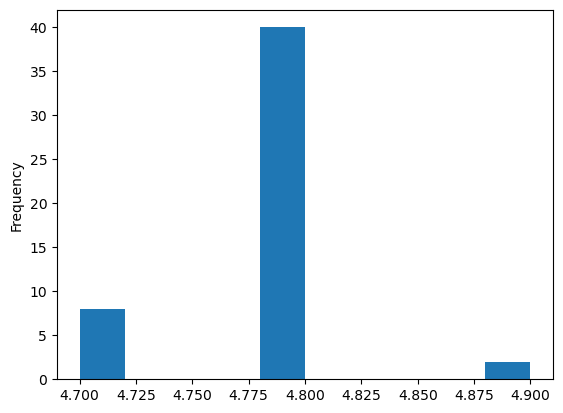

In [49]:
top_50_products["average_rating"].plot(kind = "hist")

<Axes: ylabel='Frequency'>

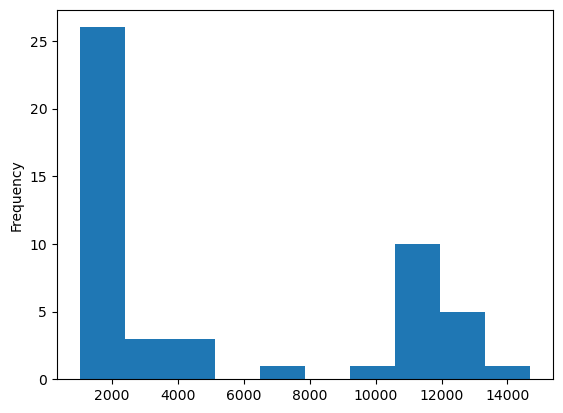

In [50]:
top_50_products["rating_number"].plot(kind = "hist")

In [51]:
pd.crosstab(index=top_50_products["title"],columns=top_50_products["average_rating"]) 

average_rating,4.7,4.8,4.9
title,,,
"1 Inch Round Thank You Sticker Labels in Script/Calligraphy Print, 1000 Stickers per Roll",0,1,0
"1 Inch Round Thank You Sticker Labels in Script/Calligraphy Print, 1000 Stickers per Roll, 2 Rolls",0,1,0
"1 Inch Round Thank You Sticker Labels with Red Hearts, 1000 Stickers per Roll",0,1,0
"1"" Metallic Red, Silver & Blue Stars Shape Foil Sticker Labels, 500 Labels per Roll, 3 Rolls, 1 Inch Diameter",0,1,0
"1.25 Inch Round Thank You Labels with Heart, Kraft Color, 1000 Stickers……",0,1,0
"1.5"" Heart Shape Kraft Paper Thank You Adhesive Label, 500 Stickers per Roll, Love Shape, 1-1/2 Inch",0,1,0
"1.5"" Inch Round Kraft, Baked with Love, Sticker with Black Font and Red Heart, 500 Labels per Roll.",0,1,0
"100 Letterpress Note Cards and Self Seal Envelopes - Perfect for Clients, Friends, Co-Workers - Blank Inside for Your Message - Opie’s Paper Company",0,0,1
"2-1/4"" x 1-1/4"" Chalkboard Black Paper Label Stickers for Essential Oil Bottles, Mason Canning Jars, Food Storage Containers and Name Tags, Over 350 Stickers, 2.25 inches x 1.25 inches",0,1,0


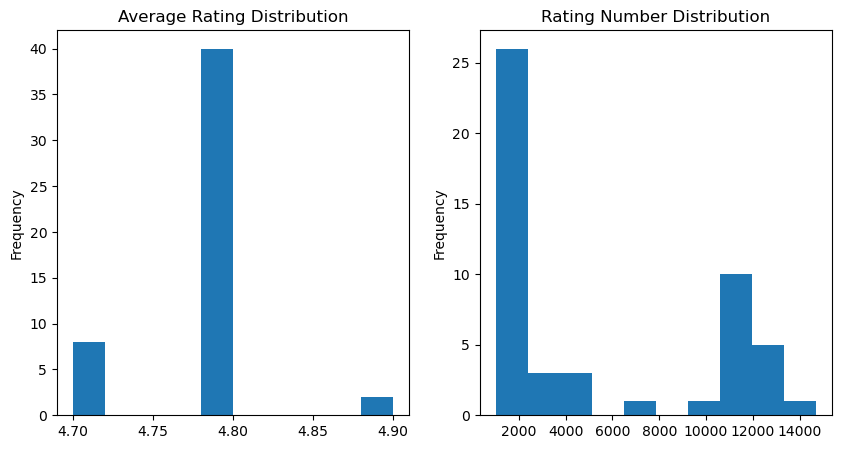

In [52]:
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
top_50_products["average_rating"].plot(kind="hist", ax=ax1, title="Average Rating Distribution")
top_50_products["rating_number"].plot(kind="hist", ax=ax2, title="Rating Number Distribution")
plt.show()

In [53]:
top_stores_count = top_50_products['store'].value_counts()
print("Stores distribution in top-rated products:")
print(top_stores_count) 

Stores distribution in top-rated products:
store
Garage Sale Pup          15
TIGI                      2
Broadway                  2
Opie's Paper Co.          1
Picoway                   1
Hibiclens                 1
Manwe                     1
NEWTGAN                   1
Secret                    1
Aquaphor                  1
SKIN AQUA                 1
LUXSURE                   1
Bausch & Lomb             1
Oral-B                    1
Pepsodent                 1
Segbeauty                 1
Helion Communications     1
Balneol                   1
With a Purpose            1
GLIDE                     1
Johnson & Johnson         1
hello                     1
Vivaplex                  1
L7 MANNEQUIN              1
Soft & Dri                1
Gauge Gear                1
Clinique                  1
TruuMe                    1
YYOJ                      1
Yuelong                   1
Jäneke                    1
Graham Professional       1
Mudder                    1
Name: count, dtype: int64


In [54]:
top_50_products.head(50)

,title,average_rating,rating_number,features,description,images,store,details,brand
63448,100 Letterpress Note Cards and Self Seal Envel...,4.9,2322,[SELF SEAL ENVELOPES: Perfect for bulk mailing...,"[Luxury Note Cards at an Affordable Price, Sho...",[{'thumb': 'https://m.media-amazon.com/images/...,Opie's Paper Co.,"{'Is Discontinued By Manufacturer': 'No', 'Pro...",None
33374,Corn Huskers Lotion 7 oz ( Pack of 4),4.9,1027,"[Moisturizes and softens dry skin, Soothes irr...",[4 Bottles of CORN HUSKERS LOTION 7 oz OIL F...,[{'thumb': 'https://m.media-amazon.com/images/...,Johnson & Johnson,"{'Brand': 'Johnson & Johnson', 'Item Form': 'L...",Johnson & Johnson
95465,Graham Sanek Neck Strips- 2.5 x 17.5-12 pks w/...,4.8,1662,"[Made of a soft, highly absorbent tissue, Neck...",[Graham Sanek Neck Strips 720 Strips/ pk],[{'thumb': 'https://m.media-amazon.com/images/...,Graham Professional,"{'Is Discontinued By Manufacturer': 'No', 'Pac...",None
76279,Tigi Bed Head Manipulator 2oz (3 PACK),4.8,1260,[tigi],[],[{'thumb': 'https://m.media-amazon.com/images/...,TIGI,"{'Product Benefits': 'Frizz Control', 'Hair Ty...",None
93953,"1"" Metallic Red, Silver & Blue Stars Shape Foi...",4.8,12203,[],[ASIN020],[{'thumb': 'https://m.media-amazon.com/images/...,Garage Sale Pup,"{'Color': 'Asin020', 'Size': 'ASIN020', 'Brand...",Garage Sale Pup
63417,"2-1/4"" x 1-1/4"" Chalkboard Black Paper Label S...",4.8,10913,[],[ASIN007],[{'thumb': 'https://m.media-amazon.com/images/...,Garage Sale Pup,"{'Color': 'Asin007', 'Size': 'ASIN007', 'Brand...",Garage Sale Pup
15974,Janeke Superbrush Brush (Green/Purple - 86SP22...,4.8,1708,[Flexible bristles gently massage the scalp. E...,[],[{'thumb': 'https://m.media-amazon.com/images/...,Jäneke,"{'Brand': 'Jäneke', 'Color': 'Green,Purple', '...",Jäneke
3954,Self Adhesive Tape - Yuelong 24Pack 2” x 5 Yar...,4.8,1406,[HIGH GRADE MATERIAL - The cohesive bandage wr...,[],[{'thumb': 'https://m.media-amazon.com/images/...,Yuelong,{'Package Dimensions': '9.5 x 7.2 x 4.6 inches...,None
63206,"1.5"" Heart Shape Kraft Paper Thank You Adhesiv...",4.8,10913,[],[ASIN001],[{'thumb': 'https://m.media-amazon.com/images/...,Garage Sale Pup,"{'Color': 'Asin001', 'Size': 'ASIN001', 'Brand...",Garage Sale Pup
77291,Hibiclens Antiseptic & Antimicrobial Skin Clea...,4.8,2140,"[Non-flammable formula, Less-irritating than o...",[Skin wound and general skin cleansing: Thorou...,[{'thumb': 'https://m.media-amazon.com/images/...,YYOJ,"{'Item Form': 'Liquid', 'Brand': 'YYOJ', 'Mate...",YYOJ


In [55]:
# all of them have an image 

In [56]:
#7 Display images and print details of the top 10 highest-rated products.

In [57]:
top10 = top_50_products.head(10)
top10.head(10)

,title,average_rating,rating_number,features,description,images,store,details,brand
63448,100 Letterpress Note Cards and Self Seal Envel...,4.9,2322,[SELF SEAL ENVELOPES: Perfect for bulk mailing...,"[Luxury Note Cards at an Affordable Price, Sho...",[{'thumb': 'https://m.media-amazon.com/images/...,Opie's Paper Co.,"{'Is Discontinued By Manufacturer': 'No', 'Pro...",None
33374,Corn Huskers Lotion 7 oz ( Pack of 4),4.9,1027,"[Moisturizes and softens dry skin, Soothes irr...",[4 Bottles of CORN HUSKERS LOTION 7 oz OIL F...,[{'thumb': 'https://m.media-amazon.com/images/...,Johnson & Johnson,"{'Brand': 'Johnson & Johnson', 'Item Form': 'L...",Johnson & Johnson
95465,Graham Sanek Neck Strips- 2.5 x 17.5-12 pks w/...,4.8,1662,"[Made of a soft, highly absorbent tissue, Neck...",[Graham Sanek Neck Strips 720 Strips/ pk],[{'thumb': 'https://m.media-amazon.com/images/...,Graham Professional,"{'Is Discontinued By Manufacturer': 'No', 'Pac...",None
76279,Tigi Bed Head Manipulator 2oz (3 PACK),4.8,1260,[tigi],[],[{'thumb': 'https://m.media-amazon.com/images/...,TIGI,"{'Product Benefits': 'Frizz Control', 'Hair Ty...",None
93953,"1"" Metallic Red, Silver & Blue Stars Shape Foi...",4.8,12203,[],[ASIN020],[{'thumb': 'https://m.media-amazon.com/images/...,Garage Sale Pup,"{'Color': 'Asin020', 'Size': 'ASIN020', 'Brand...",Garage Sale Pup
63417,"2-1/4"" x 1-1/4"" Chalkboard Black Paper Label S...",4.8,10913,[],[ASIN007],[{'thumb': 'https://m.media-amazon.com/images/...,Garage Sale Pup,"{'Color': 'Asin007', 'Size': 'ASIN007', 'Brand...",Garage Sale Pup
15974,Janeke Superbrush Brush (Green/Purple - 86SP22...,4.8,1708,[Flexible bristles gently massage the scalp. E...,[],[{'thumb': 'https://m.media-amazon.com/images/...,Jäneke,"{'Brand': 'Jäneke', 'Color': 'Green,Purple', '...",Jäneke
3954,Self Adhesive Tape - Yuelong 24Pack 2” x 5 Yar...,4.8,1406,[HIGH GRADE MATERIAL - The cohesive bandage wr...,[],[{'thumb': 'https://m.media-amazon.com/images/...,Yuelong,{'Package Dimensions': '9.5 x 7.2 x 4.6 inches...,None
63206,"1.5"" Heart Shape Kraft Paper Thank You Adhesiv...",4.8,10913,[],[ASIN001],[{'thumb': 'https://m.media-amazon.com/images/...,Garage Sale Pup,"{'Color': 'Asin001', 'Size': 'ASIN001', 'Brand...",Garage Sale Pup
77291,Hibiclens Antiseptic & Antimicrobial Skin Clea...,4.8,2140,"[Non-flammable formula, Less-irritating than o...",[Skin wound and general skin cleansing: Thorou...,[{'thumb': 'https://m.media-amazon.com/images/...,YYOJ,"{'Item Form': 'Liquid', 'Brand': 'YYOJ', 'Mate...",YYOJ


In [58]:
idx = top10.index[0]  
p_images = df.iloc[idx].images
p_details=df.iloc[idx].details
p_images

[{'thumb': 'https://m.media-amazon.com/images/I/419oi-H1DeL._SS40_.jpg',
  'large': 'https://m.media-amazon.com/images/I/419oi-H1DeL.jpg',
  'variant': 'MAIN',
  'hi_res': None},
 {'thumb': 'https://m.media-amazon.com/images/I/31STnb3vAbL._SS40_.jpg',
  'large': 'https://m.media-amazon.com/images/I/31STnb3vAbL.jpg',
  'variant': 'PT01',
  'hi_res': 'https://m.media-amazon.com/images/I/61KTWOvvluL._SL1500_.jpg'},
 {'thumb': 'https://m.media-amazon.com/images/I/41bTK5fskDL._SS40_.jpg',
  'large': 'https://m.media-amazon.com/images/I/41bTK5fskDL.jpg',
  'variant': 'PT02',
  'hi_res': 'https://m.media-amazon.com/images/I/71j+v5JAyPL._SL1500_.jpg'},
 {'thumb': 'https://m.media-amazon.com/images/I/31qi7fXLYwL._SS40_.jpg',
  'large': 'https://m.media-amazon.com/images/I/31qi7fXLYwL.jpg',
  'variant': 'PT03',
  'hi_res': 'https://m.media-amazon.com/images/I/71r4lLBuV+L._SL1500_.jpg'},
 {'thumb': 'https://m.media-amazon.com/images/I/41sLN0jvI-L._SS40_.jpg',
  'large': 'https://m.media-amazon.co

In [59]:
p_details

{'Is Discontinued By Manufacturer': 'No',
 'Product Dimensions': '11.5 x 4.2 x 5.2 inches; 3.24 Pounds',
 'UPC': '648499871505',
 'Manufacturer': "Opie's Paper Co."}

In [60]:
#8 What will be a good marketing strategy when your company launches its first product?

In [61]:
# first you need to identify your target audience after that you need to build awarness about your product you may partner with collabrations etc. 
# Gather and showcase positive reviews to build trust
# utilize email marketing and retargeting ads to stay in their mind
# and track your results and analyze them to refine your approach

In [62]:
df.head(20)

,title,average_rating,rating_number,features,description,images,store,details,brand
0,"Howard LC0008 Leather Conditioner, 8-Ounce (4-...",4.8,10,[],[],[{'thumb': 'https://m.media-amazon.com/images/...,Howard Products,{'Package Dimensions': '7.1 x 5.5 x 3 inches; ...,None
1,Yes to Tomatoes Detoxifying Charcoal Cleanser ...,4.5,3,[],[],[{'thumb': 'https://m.media-amazon.com/images/...,Yes To,"{'Item Form': 'Powder', 'Skin Type': 'Acne Pro...",Yes To
2,Eye Patch Black Adult with Tie Band (6 Per Pack),4.4,26,[],[],[{'thumb': 'https://m.media-amazon.com/images/...,Levine Health Products,{'Manufacturer': 'Levine Health Products'},None
3,"Tattoo Eyebrow Stickers, Waterproof Eyebrow, 4...",3.1,102,[],[],[{'thumb': 'https://m.media-amazon.com/images/...,Cherioll,"{'Brand': 'Cherioll', 'Item Form': 'Powder', '...",Cherioll
4,Precision Plunger Bars for Cartridge Grips – 9...,4.3,7,"[Material: 304 Stainless Steel; Brass tip, Len...",[The Precision Plunger Bars are designed to wo...,[{'thumb': 'https://m.media-amazon.com/images/...,Precision,{'UPC': '644287689178'},None
5,Lurrose 100Pcs Full Cover Fake Toenails Artifi...,3.7,35,[The false toenails are durable with perfect l...,"[Description, The false toenails are durable w...",[{'thumb': 'https://m.media-amazon.com/images/...,Lurrose,"{'Color': 'As Shown', 'Size': 'Large', 'Materi...",Lurrose
6,Stain Bonnet For Baby Bonnet Silk Sleep Cap Fo...,4.1,50,[],[],[{'thumb': 'https://m.media-amazon.com/images/...,Edoneery,"{'Brand': 'Edoneery', 'Material': 'Silk', 'Num...",Edoneery
7,50 Pieces False Eyelash Packaging Box Empty Ey...,3.8,32,[],[],[{'thumb': 'https://m.media-amazon.com/images/...,Maitys,{'Package Dimensions': '14.49 x 11.26 x 2.36 i...,None
8,Gold extatic Musk EDT 90ml,3.7,2,[Extatic Balmain Gold Musk By Balmain Edt Spra...,[Edt spray 3 oz design house: balmain],[{'thumb': 'https://m.media-amazon.com/images/...,Balmain,"{'Brand': 'Balmain', 'Item Form': 'Spray', 'It...",Balmain
9,4 Pieces Satin Bonnet Adjustable Sleep Cap Dou...,4.3,66,[],[],[{'thumb': 'https://m.media-amazon.com/images/...,Geyoga,{'Package Dimensions': '12.49 x 9.97 x 1.46 in...,None


---

In [64]:
#1 Which products have the lowest average rating? List the top 50. Use products with number of rating greater than 1000

In [65]:
filtered_products = df[df["rating_number"] > 1000] # filteirng the ones who has more than 1000 rating 

top_rated_products = filtered_products.sort_values("average_rating", ascending=True) # ascending order

lowest_50_products = top_rated_products.head(50) # shows only the first 50 

print(lowest_50_products[["title"]]) # print the results and shows only title

                                                    title
38776   Allnice Magnetic Eyelashes Dual Magnets False ...
53214   2 PCS Green Tea/Eggplant Purifying Clay Stick ...
103413  2 PCS Green Tea/Eggplant Purifying Clay Stick ...
30242   Dr. Barbara Sturm 2 Pairs Silicone Winged Eyel...
18799   American International Industries Clean + Easy...
76984   American International Industries Clean + Easy...
35179   15 Pieces Eyebrow Stencil Shaper Kit, Includes...
34437   Magnetic Eyelashes, Magnetic Eyeliner, Magneti...
97124   Halo Hair Extensions Black Invisible Wire Head...
2834    DASKY 29W Digital Anti Static Ceramic Hair Str...
39074   Hair Extensions Highlights Invisible Wire Stra...
20916   PURESSENTIEL COUPE FAIM Inhaleur aux 5 Huiles ...
19998   Rejawece 447234 2134 Lip Liner Filler Pencil s...
12309                Plexaderm Rapid Reduction Cream PLUS
70494   Rejawece 447234 2134 Lip Liner Filler Pencil s...
3955    CosmeSearch, Inc. Ultra Secret Lift Pro - Inst...
4062    Belle 

In [66]:
#2 which stores have the highest average rating 

In [67]:
item_counts = df.groupby("store")["average_rating"].mean() # group items into store and average rating 

highest_listed_stores = item_counts.sort_values(ascending=False) # descending order

print(highest_listed_stores.head(10)) #shows only the first one 

store
ESP                       5.0
kaBOOM! / Nelvana         5.0
TKB Trading, LLC          5.0
Find All                  5.0
FinchBerry                5.0
Organic Age Defense       5.0
Fijian Noni Soap          5.0
Organic Colour Systems    5.0
Organic Complexion        5.0
Fiddleestickks            5.0
Name: average_rating, dtype: float64


In [68]:
#3 which stores have the lowest average rating 

In [69]:
item_counts = df.groupby("store")["average_rating"].mean() 

lowest_rated_stores = item_counts.sort_values(ascending=True) # ascending order

print(lowest_rated_stores.head(10)) #shows only the top 10

store
Bio Sculpture (Bio Sculpture)    1.0
MAMART                           1.0
MANASI7                          1.0
QLL                              1.0
Eguled                           1.0
TBTFW                            1.0
Efulgenz                         1.0
QITAO                            1.0
FeidyLong                        1.0
JOYAL BEAUTY                     1.0
Name: average_rating, dtype: float64


In [70]:
#4 Which products have the least rating numbers and what are their average rating

In [71]:
least_rated_products = df.sort_values("rating_number", ascending=True) # sorts the rating number, ascending

print("Products with the least rating numbers:")
print(least_rated_products[["title", "rating_number", "average_rating"]].head(10)) # shows only first 10 and shows only the title, rating num and average rating

Products with the least rating numbers:
                                                   title  rating_number  \
46110        10 Headbands/Hair Bands/Jewelry Decorations              1   
8321   Lelinta Hair Bun Extensions Donut Hair Chignon...              1   
93402  Simple Yet Elegant Soft Baby Girl White Headba...              1   
73094  QuewelEyelash Extension Supplies Thickness 0.0...              1   
18851                                  Clip in Bangs #02              1   
14070  DKAF 2 Pcs Double Bangs Hairstyle Hairpin with...              1   
14069  Lot of 3 Bath & Body Works Holiday Traditions ...              1   
78021  (3 Pack) WET N WILD Color Icon Brow & Eye Line...              1   
8328   star soucre wigs 14 Inch Green Wavy Bob Wig Wi...              1   
14068  Karlash Tongue Depressors, Non-sterile, 6 Inch...              1   

       average_rating  
46110             2.0  
8321              3.0  
93402             4.0  
73094             4.0  
18851         

In [72]:
#5 Which products have the most rating numbers and what are their average rating

In [73]:
most_rated_products = df.sort_values("rating_number", ascending=False)

print("Products with the most rating numbers:")
print(most_rated_products[["title", "rating_number", "average_rating"]].head(10))

Products with the most rating numbers:
                                                    title  rating_number  \
50834         Elle 18 Eye Drama Kajal, Bold Black, 0.35 g          30206   
1403    Maybelline New York Colossal Bold Eyeliner, Bl...          27308   
51573   JIMIRE Fake Eyelashes Fluffy Volume 3D Faux Mi...          16062   
55874   THE ORDINARY Niacinamide 10% + Zinc 1% 30ml, 1...          15264   
32240   THE ORDINARY Niacinamide 10% + Zinc 1% 30ml, 1...          15185   
112578  Pro by Oral-B 2500 3D White Pink Toothbrush wi...          14700   
65359   EmaxDesign Makeup Brushes 17 Pieces Premium Sy...          13676   
109045  Oral-B Pro 2900 Electric Rechargeable Toothbru...          12870   
88581   3/4" Bright Red Round Color Coding Circle Dot ...          12205   
88535   1 Inch Round Thank You Sticker Labels with Red...          12205   

        average_rating  
50834              4.2  
1403               4.3  
51573              4.4  
55874              4.5  

In [74]:
#6 find the stores of the least rated products 

In [75]:
least_rated_stores = least_rated_products.head(10)["store"]

print("Stores of the 10 least rated products:")
print(least_rated_stores)

Stores of the 10 least rated products:
46110                 VAGA
8321               Lelinta
93402        Chic Crystals
73094                  NaN
18851               Hairro
14070                 DKAF
14069    Bath & Body Works
78021                  NaN
8328      star soucre wigs
14068              Karlash
Name: store, dtype: object


In [76]:
#7 find the stores which has most rated products 

In [77]:
most_rated_stores = most_rated_products.head(10)["store"]

print("Stores of the 10 most rated products:")
print(most_rated_stores)

Stores of the 10 most rated products:
50834                 Elle 18
1403      Maybelline New York
51573                  JIMIRE
55874            THE ORDINARY
32240            THE ORDINARY
112578                 Oral-B
65359              EmaxDesign
109045                 Oral-B
88581         Garage Sale Pup
88535         Garage Sale Pup
Name: store, dtype: object


In [78]:
#8 plot a graph that shows the average rating of the least rated products and most rated products

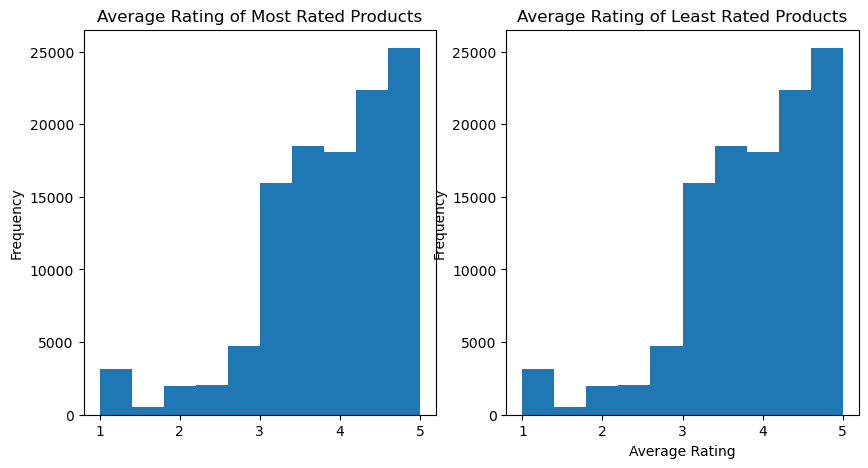

In [207]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

most_rated_products["average_rating"].plot(
    kind="hist",
    ax=ax1, # for the first x axis
    title="Average Rating of Most Rated Products"
)
least_rated_products["average_rating"].plot(
    kind="hist",
    ax=ax2, 
    title="Average Rating of Least Rated Products"
)
plt.xlabel("Average Rating")
plt.show()


In [80]:
#9 explore the products which has an average rating of 5 

In [199]:
# Filter the DataFrame to rows where average_rating is 5
perfect_rated_products = df[df["average_rating"] == 5]

# Print out some basic details about these products
print("Products with an average rating of 5:")
print(perfect_rated_products[["title", "average_rating", "rating_number", "store", "brand"]])

print(perfect_rated_products.describe()) # analyse the mean, min, max, etc

print(perfect_rated_products["features"].head()) #print the features

print(perfect_rated_products["description"].head()) # print rhe description

Products with an average rating of 5:
                                                    title  average_rating  \
32      Enjoy VOLUMIZING ELIXIR, Style (with Sleek Ste...             5.0   
34      DOVE Pro Age Neck & Chest Beauty Serum 3.3oz (...             5.0   
36      Luxury Shimmer Pearl Loose Eyeshadow Powder Ey...             5.0   
40      Dionis Goat Milk Hand Cream 4 Piece Travel Gif...             5.0   
55      Armáf Täg Hïm Colognė For Men 3.4 oz Eau De To...             5.0   
...                                                   ...             ...   
112573  Perlier:"Honey Miel" Bath and Shower Cream wit...             5.0   
112574       Heliabrine Rolling Cream with AHA 75ml/2.5oz             5.0   
112577  10pc DISPOSABLE SPA WRAP - Non-woven Elastic C...             5.0   
112585  TOPREETY 24"120gr 3/4 Full Head clip in hair e...             5.0   
112586  Pets Playmate Pet Grooming Glove,Gentle Deshed...             5.0   

        rating_number                

In [82]:
#10 explore the products which has an average rating of 1

In [201]:
worst_rated_products = df[df["average_rating"] == 1]

# Print out some basic details about these products
print("Products with an average rating of 5:")
print(worst_rated_products[["title", "average_rating", "rating_number", "store", "brand"]])

print(worst_rated_products.describe())

print(worst_rated_products["features"].head())

print(worst_rated_products["description"].head())

Products with an average rating of 5:
                                                    title  average_rating  \
87      FACE Atelier Ultra Foundation Pro, Zero Plus Plus             1.0   
155     BNG 20000 RPM Electric Nail Art Drill File Buf...             1.0   
185     Sex on the Beach Scented Lotion 180ml (2-90ml ...             1.0   
196     NiegMeag 18 20 22 24 Inch Water Wave Bundles B...             1.0   
313                              Guerra De Capos Malditos             1.0   
...                                                   ...             ...   
112550  BMC 7pc Round XL Silicone Nail Stamper Scraper...             1.0   
112569  DND Gel & Matching Polish Set #526 - Sea By Ni...             1.0   
112570  26 28 30 Inch Ombre Deep Wave Bundles 1b/30 Hu...             1.0   
112575                 Hand Cream Against Age Spots 50 Ml             1.0   
112576  1PCS Golden Airless Pump Bottles-Empty Refilla...             1.0   

        rating_number           store

In [84]:
#11 explore the differences of products which has average rating 1 and 5 in terms of rating number

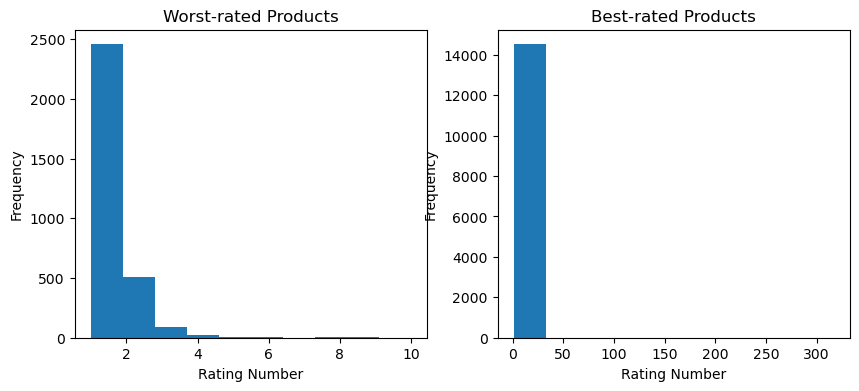

In [85]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4)) # display the size of the graphs 
plt.subplot(1, 2, 1) # we are going to display the graphs in the same row but in different columns and this code is for the first one 
worst_rated_products["rating_number"].plot(kind="hist", title="Worst-rated Products")
plt.xlabel("Rating Number") # sets x axis as raitng number

plt.subplot(1, 2, 2) # for the second graph
perfect_rated_products["rating_number"].plot(kind="hist", title="Best-rated Products")
plt.xlabel("Rating Number") # sets x axis as raitng number

plt.show()

In [174]:
#12 How many stores are selling items in the dataset?

brands_no_nan = df['store'].dropna().nunique() # drops NaN and count the unique brand names and count it 

print(f"{num_brands}")


30761


In [182]:
#12 How many brands are selling items in the dataset?

brands_no_nan = df['store'].dropna().unique() # drops NaN and count the unique brand names
num_brands = len(brands_no_nan) # Counts

print(f"{num_brands}")


30761


In [190]:
#13 Which stores have the highest ratings?
store_item_ranking = df.groupby("store")["average_rating"].mean().sort_values(ascending=False) 
print(store_item_ranking.head(10)) #shows only first 10 

store
ESP                       5.0
kaBOOM! / Nelvana         5.0
TKB Trading, LLC          5.0
Find All                  5.0
FinchBerry                5.0
Organic Age Defense       5.0
Fijian Noni Soap          5.0
Organic Colour Systems    5.0
Organic Complexion        5.0
Fiddleestickks            5.0
Name: average_rating, dtype: float64


In [ ]:
# which brands have the most rated products

In [4]:
df['brand'] = df['details'].apply(lambda x: x.get('Brand')) 
most_rated_brand = most_rated_brand.head(10)["brand"]

print("Brand of the 10 most rated products:")
print(most_rated_brand)

NameError: name 'df' is not defined